In [1]:
! git clone https://github.com/vivekvivs42/DarkflowTry.git
! wget https://pjreddie.com/media/files/yolov2-tiny.weights

Cloning into 'DarkflowTry'...
remote: Enumerating objects: 2844, done.
remote: Counting objects: 100% (2844/2844), done.
remote: Compressing objects: 100% (852/852), done.
remote: Total 2844 (delta 1961), reused 2817 (delta 1947), pack-reused 0
Receiving objects: 100% (2844/2844), 21.63 MiB | 4.38 MiB/s, done.
Resolving deltas: 100% (1961/1961), done.
--2019-10-08 20:30:10--  https://pjreddie.com/media/files/yolov2-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44948600 (43M) [application/octet-stream]
Saving to: 'yolov2-tiny.weights’

yolov2-tiny.weights 100%[===================>]  42.87M  4.61MB/s    in 10s     

2019-10-08 20:30:21 (4.29 MB/s) - 'yolov2-tiny.weights’ saved [44948600/44948600]



In [45]:
cd /home/sami/roboticists/Model/DarkflowTry

/home/sami/roboticists/Model/DarkflowTry


In [46]:
! python3 setup.py build_ext --inplace


running build_ext
copying build/lib.linux-x86_64-3.6/darkflow/cython_utils/nms.cpython-36m-x86_64-linux-gnu.so -> darkflow/cython_utils
copying build/lib.linux-x86_64-3.6/darkflow/cython_utils/cy_yolo2_findboxes.cpython-36m-x86_64-linux-gnu.so -> darkflow/cython_utils
copying build/lib.linux-x86_64-3.6/darkflow/cython_utils/cy_yolo_findboxes.cpython-36m-x86_64-linux-gnu.so -> darkflow/cython_utils


In [6]:
! pip install -e . --user


DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Obtaining file:///home/sami/roboticists/Model/DarkflowTry
  Found existing installation: darkflow 1.0.0
    Uninstalling darkflow-1.0.0:
      Successfully uninstalled darkflow-1.0.0
  Running setup.py develop for darkflow


In [7]:
! pip install . --user


DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Processing /home/sami/roboticists/Model/DarkflowTry
  Created wheel for darkflow: filename=darkflow-1.0.0-cp27-cp27mu-linux_x86_64.whl size=803166 sha256=e6275286d9c59283c829a5a59ff6832221cf78edf52e3610de972bf1830855f1
  Stored in directory: /tmp/pip-ephem-wheel-cache-ofqdWl/wheels/30/6f/3e/19a1314055f96acc826892a40bd493c690e6692398e8cb9576
Successfully built darkflow
  Found existing installation: darkflow 1.0.0
    Uninstalling darkflow-1.0.0:
      Successfully uninstalled darkflow-1.0.0


In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.contrib.slim as slim
from darkflow.net.build import TFNet
import cv2


In [48]:
ls

build/  darkflow/           flow*       preview.png  setup.py
cfg/    darkflow.egg-info/  labels.txt  README.md    test/
ckpt/   demo.gif            LICENSE     sample_img/  YOLO.ipynb


In [49]:
options = {"model": "cfg/yolov2-tiny.cfg", 
           "load": "../yolov2-tiny.weights",
           "Train":False,
           "threshold":0.01}

In [50]:
tfnet = TFNet(options)

Parsing ./cfg/yolov2-tiny.cfg
Parsing cfg/yolov2-tiny.cfg
Loading ../yolov2-tiny.weights ...
Successfully identified 44948600 bytes
Finished in 0.0102219581604s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (

In [51]:
import pprint as pp
original_img = cv2.imread("/home/sami/roboticists/Model/img/item.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet.return_predict(original_img)
print(results)





[{'topleft': {'y': 0, 'x': 18}, 'confidence': 0.023620047, 'bottomright': {'y': 64, 'x': 197}, 'label': 'person'}, {'topleft': {'y': 1, 'x': 88}, 'confidence': 0.034021676, 'bottomright': {'y': 61, 'x': 310}, 'label': 'person'}, {'topleft': {'y': 5, 'x': 179}, 'confidence': 0.041830707, 'bottomright': {'y': 51, 'x': 269}, 'label': 'person'}, {'topleft': {'y': 5, 'x': 167}, 'confidence': 0.027130362, 'bottomright': {'y': 97, 'x': 280}, 'label': 'bottle'}, {'topleft': {'y': 0, 'x': 7}, 'confidence': 0.04130991, 'bottomright': {'y': 184, 'x': 85}, 'label': 'person'}, {'topleft': {'y': 0, 'x': 0}, 'confidence': 0.016715508, 'bottomright': {'y': 214, 'x': 231}, 'label': 'vase'}, {'topleft': {'y': 8, 'x': 313}, 'confidence': 0.035436586, 'bottomright': {'y': 217, 'x': 394}, 'label': 'person'}, {'topleft': {'y': 0, 'x': 0}, 'confidence': 0.13516079, 'bottomright': {'y': 266, 'x': 322}, 'label': 'person'}, {'topleft': {'y': 0, 'x': 145}, 'confidence': 0.016655084, 'bottomright': {'y': 266, 'x'

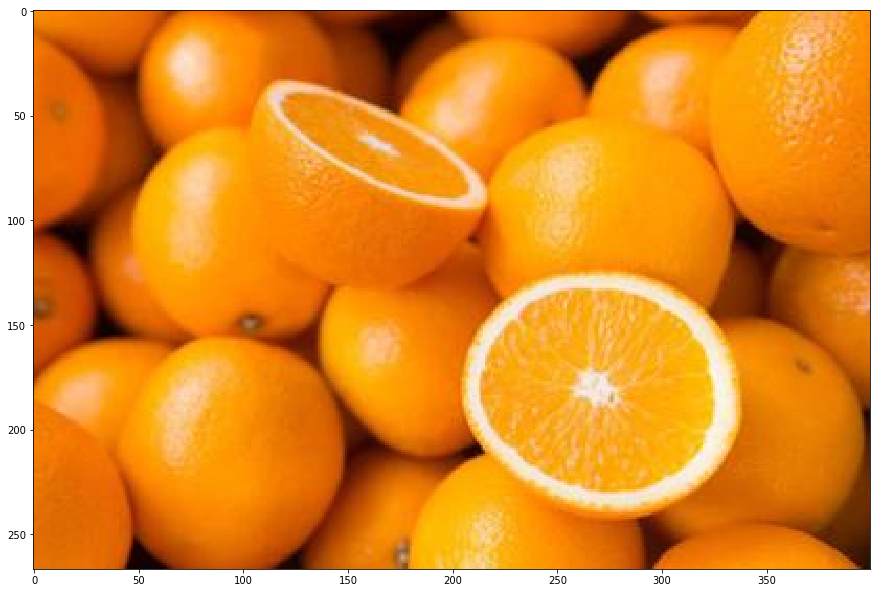

In [54]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(original_img)

In [55]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.04:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage

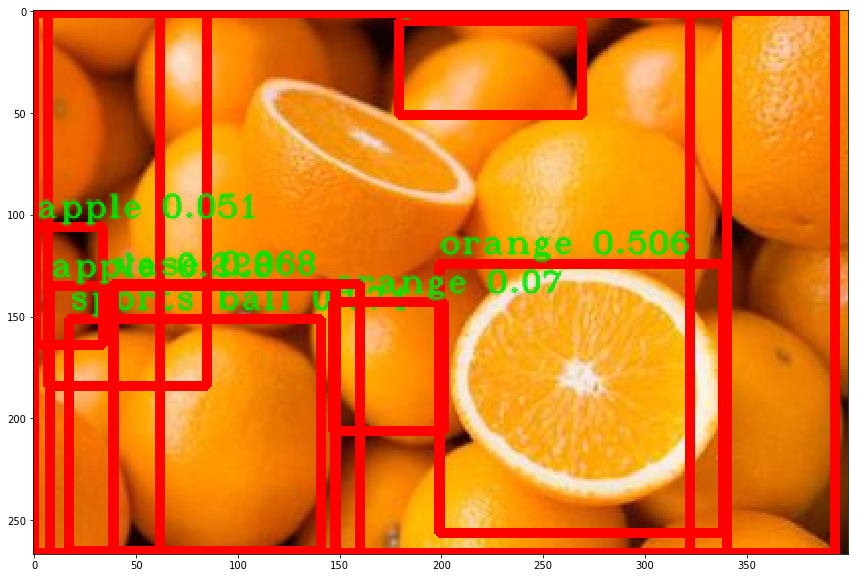

In [56]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))